# Exporting timeseries to Pastastore using hydropandas

This notebook shows how to use the `hydropandas` package to create a `PastaStore` from point observations. A `pastastore` is a combination of observations, stresses and `pastas` time series models.

## Contents<a id=top></a>

1. [Exporting oseries](#oseries)
2. [Exporting stresses](#stresses)
3. [Create and solve models](#models)
4. [Getting model results](#modelresults)

In [1]:
import pastastore as pst
import pandas as pd
import pastas as ps
from hydropandas import ObsCollection
from hydropandas.io import io_knmi
from hydropandas.observation import KnmiObs

import logging

In [2]:
logging.basicConfig(level=logging.ERROR)

## [Exporting oseries](#top)<a id=oseries></a>

In [3]:
extent = [117850, 117980, 439550, 439700]  # Schoonhoven zuid-west
dinozip = '../tests/data/2019-Dino-test/dino.zip'
oc_dino = ObsCollection.from_dino(dirname=dinozip, keep_all_obs=False)
oc_dino = oc_dino.loc[['B58A0092-004', 'B58A0092-005', 'B58A0102-001', 'B58A0167-001', 'B58A0212-001']]
oc_dino

,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
B58A0092-004,186924.0,372026.0,C:\Users\oebbe\AppData\Local\Temp\tmp4jo7q178\...,B58A0092,4.0,-115.23,-117.23,29.85,29.61,True,-----metadata------ name : B58A0092-004 x : 1...
B58A0092-005,186924.0,372026.0,C:\Users\oebbe\AppData\Local\Temp\tmp4jo7q178\...,B58A0092,5.0,-134.23,-137.23,29.84,29.62,True,-----metadata------ name : B58A0092-005 x : 1...
B58A0102-001,187900.0,373025.0,C:\Users\oebbe\AppData\Local\Temp\tmp4jo7q178\...,B58A0102,1.0,-3.35,-8.35,29.65,29.73,True,-----metadata------ name : B58A0102-001 x : 1...
B58A0167-001,185745.0,371095.0,C:\Users\oebbe\AppData\Local\Temp\tmp4jo7q178\...,B58A0167,1.0,23.33,22.33,30.50,30.21,True,-----metadata------ name : B58A0167-001 x : 1...
B58A0212-001,183600.0,373020.0,C:\Users\oebbe\AppData\Local\Temp\tmp4jo7q178\...,B58A0212,1.0,26.03,25.53,28.49,28.53,True,-----metadata------ name : B58A0212-001 x : 1...


In [4]:
oc_dino.stats.get_first_last_obs_date()

,date_first_measurement,date_last_measurement
name,,
B58A0092-004,1979-02-28,2018-07-31
B58A0092-005,1979-02-28,2014-12-31
B58A0102-001,1982-03-30,2000-06-14
B58A0167-001,1979-02-28,2002-02-28
B58A0212-001,1963-05-28,2001-11-28


In [5]:
# add observations to pastastore
pstore = oc_dino.to_pastastore()

## [Exporting stresses](#top)<a id=stresses></a>

In [6]:
tmintmax = pstore.get_tmin_tmax("oseries")

tmin = tmintmax.tmin.min()
tmax = tmintmax.tmax.max()

In [7]:
meteo_vars=('RD', 'EV24')
kinds = ('prec', 'evap')
knmi_oc = ObsCollection.from_knmi(locations=oc_dino, 
                                  meteo_vars=meteo_vars,
                                  start=[tmin, tmin], 
                                  end=[tmax,tmax], 
                                  cache=True)

In [8]:
knmi_oc

,x,y,filename,station,meteo_var,obs
name,,,,,,
HEIBLOEM-L,189578.654040,366023.086600,,967,RD,-----metadata------ name : HEIBLOEM-L x : 189...
SOMEREN,175582.042578,377071.128150,,904,RD,-----metadata------ name : SOMEREN x : 175582...
ELL,181488.403514,356704.652138,,377,EV24,-----metadata------ name : ELL x : 181488.403...


In [9]:
# add stresses to pastastore
for i, meteo_var in enumerate(meteo_vars):
    knmi_oc[knmi_oc.meteo_var==meteo_var].to_pastastore(pstore, obs_column=meteo_var, 
                                                        kind=kinds[i])

## [Creating and solving models](#top)<a id=models></a>

In [10]:
pstore.create_models_bulk(store=True, add_recharge=True, ignore_errors=False);

Bulk creation models:   0%|                                                                      | 0/5 [00:00<?, ?it/s]INFO: Nan-values were removed at the end of the time series B58A0092-004.
INFO:pastas.timeseries:Nan-values were removed at the end of the time series B58A0092-004.
INFO: Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO: Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO: Inferred frequency for time series HEIBLOEM-L: freq=D
INFO:pastas.timeseries:Inferred frequency for time series HEIBLOEM-L: freq=D
INFO: Inferred frequency for time series ELL: freq=D
INFO:pastas.timeseries:Inferred frequency for time series ELL: freq=D
INFO: Cannot determine frequency of series B58A0092-00

In [11]:
pstore.solve_models()

Solving models:   0%|                                                                            | 0/5 [00:00<?, ?it/s]INFO: Nan-values were removed at the end of the time series B58A0092-004.
INFO:pastas.timeseries:Nan-values were removed at the end of the time series B58A0092-004.
INFO: Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO: Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO: User provided frequency for time series HEIBLOEM-L: freq=D
INFO:pastas.timeseries:User provided frequency for time series HEIBLOEM-L: freq=D
INFO: User provided frequency for time series ELL: freq=D
INFO:pastas.timeseries:User provided frequency for time series ELL: freq=D
Solving models:  20%|█████████████

## [Getting model results](#top)<a id=modelresults></a>

In [12]:
# results from all models
pstore.model_results(progressbar=False)

INFO: Nan-values were removed at the end of the time series B58A0092-004.
INFO:pastas.timeseries:Nan-values were removed at the end of the time series B58A0092-004.
INFO: Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO: Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO: User provided frequency for time series HEIBLOEM-L: freq=D
INFO:pastas.timeseries:User provided frequency for time series HEIBLOEM-L: freq=D
INFO: User provided frequency for time series ELL: freq=D
INFO:pastas.timeseries:User provided frequency for time series ELL: freq=D
INFO: Cannot determine frequency of series B58A0092-005: freq=None. The time series is irregular.
INFO:pastas.timeseries:Cannot determine frequency of se

,recharge_A,recharge_n,recharge_a,recharge_f,constant_d,noise_alpha,recharge_A_stderr,recharge_n_stderr,recharge_a_stderr,recharge_f_stderr,constant_d_stderr,noise_alpha_stderr,evp,number of observations used in calibration,memory recharge [days],rfunc recharge,calibration period [days]
B58A0092-004,550.645613,1.256781,112.468999,-1.217295,25.057434,680.272945,73.713657,0.028905,13.618458,0.111306,0.189368,212.852982,49.550647,NaN,307.610081,Gamma,14391
B58A0092-005,422.242423,1.258871,110.143688,-1.454835,25.257693,966.29841,57.454906,0.02539,12.491383,0.138779,0.220464,362.380881,51.54591,NaN,301.627611,Gamma,13090
B58A0102-001,1523.735101,0.910656,430.110311,-1.102753,27.049854,110.859472,196.350993,0.024312,81.62584,0.103465,0.260737,25.506751,87.675925,NaN,922.866028,Gamma,6651
B58A0167-001,1184.311486,1.090011,187.353122,-0.994367,27.189817,137.991633,167.152355,0.030709,32.010814,0.094625,0.210537,27.551524,78.790827,NaN,460.330062,Gamma,8401
B58A0212-001,993.215243,0.960774,223.707398,-1.051472,26.704229,102.863176,109.671401,0.02333,34.647622,0.08587,0.148781,13.834518,70.694862,NaN,499.799082,Gamma,14064


In [13]:
pstore.get_statistics(["evp"])

INFO: Nan-values were removed at the end of the time series B58A0092-004.
INFO:pastas.timeseries:Nan-values were removed at the end of the time series B58A0092-004.
INFO: Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO: Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO: User provided frequency for time series HEIBLOEM-L: freq=D
INFO:pastas.timeseries:User provided frequency for time series HEIBLOEM-L: freq=D
INFO: User provided frequency for time series ELL: freq=D
INFO:pastas.timeseries:User provided frequency for time series ELL: freq=D
INFO: Cannot determine frequency of series B58A0092-005: freq=None. The time series is irregular.
INFO:pastas.timeseries:Cannot determine frequency of se

B58A0092-004    49.550647
B58A0092-005    51.545910
B58A0102-001    87.675925
B58A0167-001    78.790827
B58A0212-001    70.694862
Name: evp, dtype: float64

INFO: Cannot determine frequency of series B58A0167-001: freq=None. The time series is irregular.
INFO:pastas.timeseries:Cannot determine frequency of series B58A0167-001: freq=None. The time series is irregular.
INFO: User provided frequency for time series HEIBLOEM-L: freq=D
INFO:pastas.timeseries:User provided frequency for time series HEIBLOEM-L: freq=D
INFO: User provided frequency for time series ELL: freq=D
INFO:pastas.timeseries:User provided frequency for time series ELL: freq=D


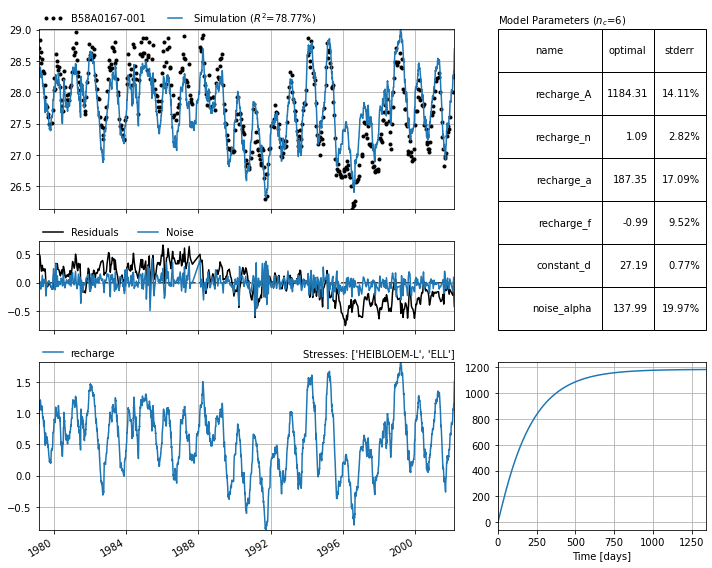

In [14]:
# results from a single model
ml1 = pstore.get_models('B58A0167-001')
ml1.plots.results();